# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você conclui esse projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de mergulhar na análise dos seus dados, explique em suas palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [2]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


## Carregue os dados

In [3]:
# Carregue os arquivos de dados em diferentes DataFrames

df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [4]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Imprima uma amostra de dados dos planos
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


No conjunto de dados de planos tudo está conforme, não há dados nulos, nem duplicados, e os tipos de dados estão conformes, a única alteração a ser feita é que a coluna mb_per_month_included está em megabytes, sendo que a empresa cobra GB e há arrendondamento para cima ao final do mês.

## Corrija os dados

Transformando a coluna mb_per_month_included em gb_per_month_included

In [6]:
df_plans.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace = True)
df_plans['gb_per_month_included'] = [15, 30]
df_plans.head()

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Usuários

In [7]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprima uma amostra de dados dos usuários
df_users.head(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [9]:
#Verificar duplicados explicítos
df_users[df_users.duplicated()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

O tipo das colunas reg_date e churn_date podem ser transformados em datas, deve ser retirada da coluna city a informação do estado. A informação do mês é importante ser tirada de reg_date e churn_date para facilitar algumas análises

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [10]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriqueça os dados

Criar colunas para os meses de registro e para os meses de encerramento, para poder fazer análises por mês.

Separar as informações de cidade de região

In [11]:
#Separar o mês da data de registro
df_users['reg_month'] = df_users['reg_date'].dt.month

#Separar o mês da data de encerramento
df_users['churn_month'] = df_users['churn_date'].dt.month

#Juntar as colunas de nomes em uma só
df_users['name'] = df_users['first_name']+' '+df_users['last_name']

#Separar a cidade da região
df_users[['city', 'state']] = df_users['city'].str.split(', ', expand=True)

#Excluindo as colunas de primeiro nome e sobrenome
df_users.drop(['first_name','last_name'], axis=1)

#Reorganizando a ordem das colunas para fazer mais sentido
df_users = df_users[['user_id','name','age','city','state','reg_date','reg_month','plan','churn_date','churn_month']]

#Mostrar como ficou o Dataframe
df_users.head(10)


,user_id,name,age,city,state,reg_date,reg_month,plan,churn_date,churn_month
0,1000,Anamaria Bauer,45,Atlanta-Sandy Springs-Roswell,GA MSA,2018-12-24,12,ultimate,NaT,NaN
1,1001,Mickey Wilkerson,28,Seattle-Tacoma-Bellevue,WA MSA,2018-08-13,8,surf,NaT,NaN
2,1002,Carlee Hoffman,36,Las Vegas-Henderson-Paradise,NV MSA,2018-10-21,10,surf,NaT,NaN
3,1003,Reynaldo Jenkins,52,Tulsa,OK MSA,2018-01-28,1,surf,NaT,NaN
4,1004,Leonila Thompson,40,Seattle-Tacoma-Bellevue,WA MSA,2018-05-23,5,surf,NaT,NaN
5,1005,Livia Shields,31,Dallas-Fort Worth-Arlington,TX MSA,2018-11-29,11,surf,NaT,NaN
6,1006,Jesusa Bradford,73,San Francisco-Oakland-Berkeley,CA MSA,2018-11-27,11,ultimate,2018-12-18,12.0
7,1007,Eusebio Welch,42,Grand Rapids-Kentwood,MI MSA,2018-07-11,7,surf,NaT,NaN
8,1008,Emely Hoffman,53,Orlando-Kissimmee-Sanford,FL MSA,2018-08-03,8,ultimate,NaT,NaN
9,1009,Gerry Little,19,San Jose-Sunnyvale-Santa Clara,CA MSA,2018-04-22,4,surf,NaT,NaN


In [12]:
#Substituir os valores nulos pelo valor 0
df_users['churn_month'].fillna(0, inplace=True)
#Tranformar os dados de mês em int
df_users['churn_month'] = df_users['churn_month'].astype('int')
#Amostra do Dataframe
df_users.head(10)

,user_id,name,age,city,state,reg_date,reg_month,plan,churn_date,churn_month
0,1000,Anamaria Bauer,45,Atlanta-Sandy Springs-Roswell,GA MSA,2018-12-24,12,ultimate,NaT,0
1,1001,Mickey Wilkerson,28,Seattle-Tacoma-Bellevue,WA MSA,2018-08-13,8,surf,NaT,0
2,1002,Carlee Hoffman,36,Las Vegas-Henderson-Paradise,NV MSA,2018-10-21,10,surf,NaT,0
3,1003,Reynaldo Jenkins,52,Tulsa,OK MSA,2018-01-28,1,surf,NaT,0
4,1004,Leonila Thompson,40,Seattle-Tacoma-Bellevue,WA MSA,2018-05-23,5,surf,NaT,0
5,1005,Livia Shields,31,Dallas-Fort Worth-Arlington,TX MSA,2018-11-29,11,surf,NaT,0
6,1006,Jesusa Bradford,73,San Francisco-Oakland-Berkeley,CA MSA,2018-11-27,11,ultimate,2018-12-18,12
7,1007,Eusebio Welch,42,Grand Rapids-Kentwood,MI MSA,2018-07-11,7,surf,NaT,0
8,1008,Emely Hoffman,53,Orlando-Kissimmee-Sanford,FL MSA,2018-08-03,8,ultimate,NaT,0
9,1009,Gerry Little,19,San Jose-Sunnyvale-Santa Clara,CA MSA,2018-04-22,4,surf,NaT,0


## Chamadas

In [13]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
#Verificando dados duplicados
df_calls[df_calls.duplicated()]

,id,user_id,call_date,duration


In [15]:
# Imprima uma amostra de dados das chamadas

df_calls.head(20)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Não existem dados duplicados, porém existiam chamadas com 0 minutos que poderiam atrapalhar nos cálculos e também não devem ser consideradas para o plano, portanto foram excluídas da amostra.
Também transformar o tipo de dado da coluna call_date em datetime 

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [16]:
#Excluindo as chamadas que tem duração de 0 minutos
mask = (df_calls['duration'] == 0.0)

df_calls = df_calls.loc[~mask]
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         110901 non-null  object 
 1   user_id    110901 non-null  int64  
 2   call_date  110901 non-null  object 
 3   duration   110901 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
#Transformar o tipo de dados em data
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [18]:
#Verificar alteração no tipo de dado
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriqueça os dados

O mês em que a chamada foi feita é um dado importante para a nossa análise futura

In [19]:
#Criar a coluna mês da chamada
df_calls['call_month'] = df_calls['call_date'].dt.month
#Verificar o Dataframe após a criação da coluna
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          110901 non-null  object        
 1   user_id     110901 non-null  int64         
 2   call_date   110901 non-null  datetime64[ns]
 3   duration    110901 non-null  float64       
 4   call_month  110901 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.1+ MB


## Mensagens

In [20]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
# Imprima uma amostra dos dados das mensagens
df_messages.head(10)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [22]:
#Verificar dados duplicados explícitos
df_messages[df_messages.duplicated()]

,id,user_id,message_date


A coluna message_date é melhor que tenha seu tipo alterado para datetime

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [23]:
#Tranformando o tipo do dado da coluna message_date
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
#Verificando a alteração
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriqueça os dados

O mês da messagem é um dado importante para a nossa análise

In [24]:
#Criando a coluna contendo a informação do mês da messagem
df_messages['message_month'] = df_messages['message_date'].dt.month
#Verificando a nova coluna
df_messages.head()

,id,user_id,message_date,message_month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [25]:
# Imprima as informações gerais/resumidas sobre o DataFrame da internet
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [26]:
#  Imprima uma amostra de dados para o tráfego da internet
df_internet.head(10)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [27]:
#Verificando dados duplicados
df_internet[df_internet.duplicated()]

,id,user_id,session_date,mb_used


Tranformar o tipo de dados de session_date em datetime e Criar a coluna mês para a sessão

### Corrija os dados

In [28]:
#Transformando o tipo de dado de session_date
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
#Verificando o novo tipo de dado
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriqueça os dados

Criar a coluna mês para a análise por mês

In [29]:
#Criando a coluna session_month
df_internet['session_month'] = df_internet['session_date'].dt.month
#Verificando a nova coluna
df_internet.head()

,id,user_id,session_date,mb_used,session_month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Estude as condições dos planos

[É fundamental entender como os planos funcionam e como são as cobranças dos usuários com base na assinatura. Sugerimos imprimir as informações do plano para visualizar novamente as condições.]

In [30]:
# Imprima as condições do plano e certifique-se de que elas fazem sentido para você
df_plans


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Agregue os dados por usuário

[Agora, como os dados estão limpos, agregue os dados por usuário por período para ter apenas um registro por usuário por período. Isso vai facilitar muito a análise posterior.]

In [31]:
#Criando função que recebe o Dataframe, a coluna referência, a função de agragação dos dados e nome da coluna no novo Dataframe
#Com essa função será possível pegar os dados dos diferentes dataframes e junta-los no novo para ter o consumo do usuário 
# em um lugar só

def group_users_by_month(df, column, values, aggfunc, column_name):
    #Agrupa os valores com base no ID e na coluna informada, juntando os dados pela quantidade ou soma
    table = df.groupby(['user_id', column])[[values]].agg(aggfunc)
    #Reseta os índices e coloca ID como uma coluna e substitui os dados na tabela
    table.reset_index(inplace=True)
    #Renomeia a coluna para ficar de acordo com os dados apresentados, atualizando os dados da tabela
    table.rename(columns={values: column_name, column:'month'}, inplace=True)
    #Retorna a Tabela(dataframe) resultante da operação
    return table

In [32]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

table_user_calls_month = group_users_by_month(df_calls, 'call_month','id', 'count', 'count_calls')
#Verifica a tabela Resultante
table_user_calls_month

,user_id,month,count_calls
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49
...,...,...,...
2251,1498,12,32
2252,1499,9,35
2253,1499,10,41
2254,1499,11,39


In [33]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

table_user_minutes_month = group_users_by_month(df_calls, 'call_month','duration', 'sum', 'sum_minutes')
#Verifica a tabela Resultante
table_user_minutes_month

,user_id,month,sum_minutes
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2251,1498,12,324.77
2252,1499,9,330.37
2253,1499,10,363.28
2254,1499,11,288.56


In [34]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

table_user_messages_month = group_users_by_month(df_messages, 'message_month','id', 'count', 'count_messages')
#Verifica a tabela Resultante
table_user_messages_month

,user_id,month,count_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [35]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

table_user_internet_month = group_users_by_month(df_internet, 'session_month','mb_used', 'sum', 'mb_used')
#Verifica a tabela Resultante
table_user_internet_month

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


[Coloque os dados agregados em um DataFrame para que um registro nele represente o que um usuário unívoco consumiu em um determinado mês.]

In [36]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
#Usar o reduce para juntar as tabelas diferentes em uma só
from functools import reduce
#Lista das tabelas que serão juntadas
tables = [table_user_calls_month, table_user_internet_month, table_user_messages_month, table_user_minutes_month]
#Nova tabela que será resultado da junção baseada no user_id e em month
df_user_usage_by_month = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), tables)
df_user_usage_by_month


,user_id,month,count_calls,mb_used,count_messages,sum_minutes
0,1000,12,16.0,1901.47,11.0,116.83
1,1001,8,22.0,6919.15,30.0,171.14
2,1001,9,38.0,13314.82,44.0,297.69
3,1001,10,47.0,22330.49,53.0,374.11
4,1001,11,49.0,18504.30,36.0,404.59
...,...,...,...,...,...,...
2288,1349,11,NaN,17128.26,72.0,NaN
2289,1349,12,NaN,13039.91,61.0,NaN
2290,1361,5,NaN,1519.69,2.0,NaN
2291,1407,11,NaN,290.06,1.0,NaN


In [37]:
# Adicione as informações sobre o plano
#Função para aplicar no Dataframe e retornar qual o plano do usuário usando o DF df_users
def user_plan (user_id):
    plan = df_users[df_users['user_id'] == user_id]
    return plan.iloc[0,7]

#Criando a coluna plano no novo dataframe
df_user_usage_by_month['plan'] = df_user_usage_by_month['user_id'].apply(user_plan)
df_user_usage_by_month


,user_id,month,count_calls,mb_used,count_messages,sum_minutes,plan
0,1000,12,16.0,1901.47,11.0,116.83,ultimate
1,1001,8,22.0,6919.15,30.0,171.14,surf
2,1001,9,38.0,13314.82,44.0,297.69,surf
3,1001,10,47.0,22330.49,53.0,374.11,surf
4,1001,11,49.0,18504.30,36.0,404.59,surf
...,...,...,...,...,...,...,...
2288,1349,11,NaN,17128.26,72.0,NaN,surf
2289,1349,12,NaN,13039.91,61.0,NaN,surf
2290,1361,5,NaN,1519.69,2.0,NaN,surf
2291,1407,11,NaN,290.06,1.0,NaN,ultimate


[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano de chamadas; adicione o preço mensal dependendo do plano. Importante: isso pode não ser tão trivial quanto apenas algumas linhas, dadas as condições do plano. Portanto, não há problema em gastar algum tempo nisso.]

In [38]:
# Calcule a receita mensal para cada usuário
# Função que recebe a linha de um usuário contendo o consumo mensal dele e qual o seu plano
def monthly_revenue(row):
    # A receita é iniciado com o valor nulo
    revenue = 0
    # O cálculo do consumo é feito em GB enquanto o consumo é medido em MB por isso é necessária a transformação
    gb_used = row['mb_used']/1024
    #Cálculo para planos ultimate
    if row['plan'] == 'ultimate':
        #Preço base do plano Ultimate
        revenue += 70
        #Verifica se houve consumo maior de minutos que o previsto dentro do plano e realiza a cobrança baseado no consumo extra
        if row['sum_minutes'] > 3000:
            #Arredonda o consumo para cima conforme regra
            revenue += 0.01*(np.ceil(row['sum_minutes']) - 3000)
        #Verifica se houve consumo maior de mensagens que o previsto dentro do plano e realiza a cobrança baseado no consumo extra
        if row['count_messages'] > 1000:
            #Arredonda o consumo para cima conforme regra
            revenue += 0.01*(row['count_messages'] - 1000)
        #Verifica se houve consumo maior de internet que o previsto dentro do plano e realiza a cobrança baseado no consumo extra
        if gb_used > 30:
            #Arredonda o consumo para cima conforme regra
            revenue += 7*(np.ceil(gb_used)-30)
    else:
        revenue += 20
        #Verifica se houve consumo maior de minutos que o previsto dentro do plano e realiza a cobrança baseado no consumo extra
        if row['sum_minutes'] > 500:
            #Arredonda o consumo para cima conforme regra
            revenue += 0.03*(np.ceil(row['sum_minutes']) - 500)
        #Verifica se houve consumo maior de mensagens que o previsto dentro do plano e realiza a cobrança baseado no consumo extra
        if row['count_messages'] > 50:
            #Arredonda o consumo para cima conforme regra
            revenue += 0.03*(row['count_messages'] - 50)
        #Verifica se houve consumo maior de internet que o previsto dentro do plano e realiza a cobrança baseado no consumo extra
        if gb_used > 15:
            #Arredonda o consumo para cima conforme regra
            revenue += 10*(np.ceil(gb_used)-15)
    #Retorna a Receita
    return revenue

#Criação da nova coluna, aplicando a função em cada linha do DataFrame
df_user_usage_by_month['revenue'] = df_user_usage_by_month.apply(monthly_revenue, axis = 1)
df_user_usage_by_month.head(10)

,user_id,month,count_calls,mb_used,count_messages,sum_minutes,plan,revenue
0,1000,12,16.0,1901.47,11.0,116.83,ultimate,70.00
1,1001,8,22.0,6919.15,30.0,171.14,surf,20.00
2,1001,9,38.0,13314.82,44.0,297.69,surf,20.00
3,1001,10,47.0,22330.49,53.0,374.11,surf,90.09
4,1001,11,49.0,18504.30,36.0,404.59,surf,60.00
5,1001,12,46.0,19369.18,44.0,392.93,surf,60.00
6,1002,10,8.0,6552.01,15.0,54.13,surf,20.00
7,1002,11,48.0,19345.08,32.0,359.76,surf,60.00
8,1002,12,38.0,14396.24,41.0,363.24,surf,20.00
9,1003,12,118.0,27044.14,50.0,1041.00,surf,156.23


## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados e unidos, que geralmente revelam uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para chamadas, mas elas não são fornecidas para mensagens e internet, embora o princípio do estudo estatístico seja o mesmo para todas.]

### Chamadas

<AxesSubplot:xlabel='Mês', ylabel='média de minutos'>

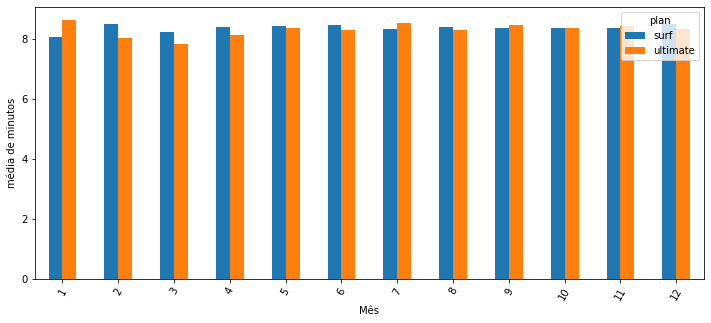

In [39]:
# Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.
#Cria a tabela com o consumo de minutos em cada mês por usuários de determinado plano
table1 = pd.pivot_table(df_user_usage_by_month, values='sum_minutes', index='month', columns='plan', aggfunc='sum')
#Cria a tabela com a quantidade ligações em cada mês por usuários de determinado plano
table2 = pd.pivot_table(df_user_usage_by_month, values='count_calls', index='month', columns='plan', aggfunc='sum')
#Dividindo a quantidade de minutos pela quantidade de ligações temos a média de quanto tempo é gasto em cada ligação
table3 = table1/table2
#Gráfico da duração média de chamadas de cada plano por mÊs
table3.plot(kind='bar', figsize=(12,5), ylabel='média de minutos', xlabel='Mês', rot=60)

<AxesSubplot:ylabel='Frequency'>

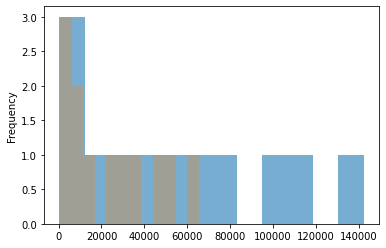

In [40]:
# Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.
table1t = table1.T
test = table1t.reset_index()
tabletest = table1.reset_index()
table1['surf'].plot(kind='hist', bins=12, alpha=0.6)
table1['ultimate'].plot(kind='hist', bins=12, alpha=0.3)


[Calcule a média e a variável da duração da chamada para raciocinar se os usuários de diferentes planos possuem comportamentos diferentes em suas chamadas.]

In [41]:
# Calcule a média e a variação da duração mensal das chamadas
# Agrupação dos dados baseada na média de duração da chamada por mês
mean_var_calls = df_calls.groupby('call_month')['duration'].mean()
#Tranforma a agrupação em Dataframe para adicionar mais dados
mean_var_calls = mean_var_calls.to_frame(name='mean')
#Cria lista para adicionar ao Dataframe posteriormente como variação da duração da chamada em cada mês
vars_month = []
# Verifica todas as chamadas de um mês e retorna a Variação da duração delas
for i in mean_var_calls.index:
    #Inclui a variação calculada baseado no índice que tem o mesmo número do mês base
    vars_month.append(np.var(df_calls[df_calls['call_month'] == i]['duration']))
#Inclui a lista com a Variação no Dataframe
mean_var_calls['var'] = vars_month
mean_var_calls


,mean,var
call_month,,
1,8.408496,26.065366
2,8.245930,29.543392
3,8.076893,27.797106
4,8.294357,27.767521
5,8.406820,29.066561
6,8.404504,29.323964
7,8.383273,28.338426
8,8.351211,28.401938
9,8.389454,29.040628


<AxesSubplot:title={'center':'duration'}, xlabel='call_month'>

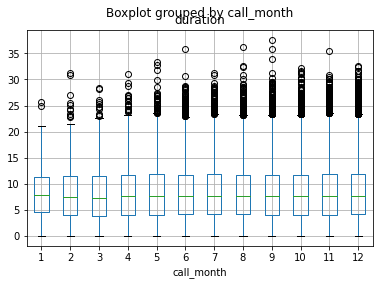

In [42]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

df_calls.boxplot(column='duration', by='call_month')


[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

As chamadas não tem grande diferença de duração entre os usuários de planos diferentes, provavelmente os usuários não levam tanto em consideração o plano ou o preço cobrado na hora de realizar chamadas.

As chamadas em geral tem duração de 5 a 12 minutos. Mas também existem chamadas com durações bem longas. No conjunto de dados existem muitas chamadas com 0,01s e outras durações que podem ser só um toque para chamar atenção

### Mensagens

<AxesSubplot:xlabel='Mês', ylabel='Mensagens enviadas'>

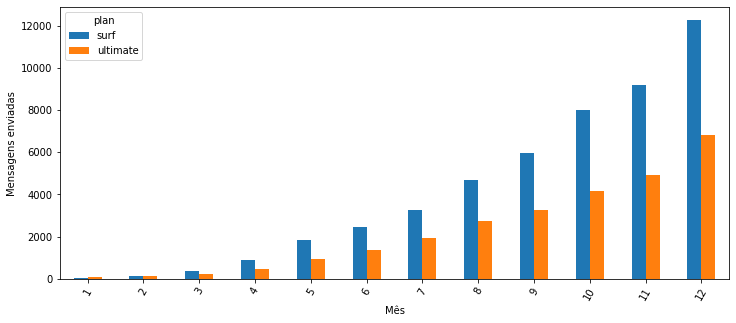

In [43]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês
#Tabela com a quantidade de mensagens por mês, agregadas pelos diferentes planos
messages_by_month = pd.pivot_table(df_user_usage_by_month, values='count_messages', index='month', columns='plan', aggfunc='sum')
messages_by_month.plot(kind='bar', figsize=(12,5), ylabel='Mensagens enviadas', xlabel='Mês', rot=60)

In [44]:
#Quantidade de usuários de cada plano por mês
user_count_by_month = pd.pivot_table(df_user_usage_by_month, values='user_id', index='month', columns='plan', aggfunc='count')

<AxesSubplot:xlabel='Mês', ylabel='Média de mensagens enviadas'>

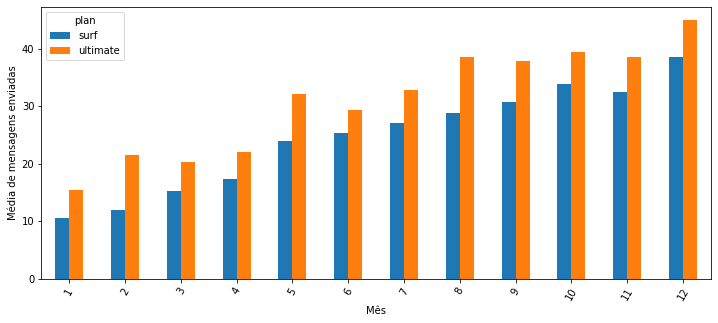

In [45]:
#média de mensagens por usuário de cada plano por mês
messages_by_user_mean = messages_by_month/user_count_by_month
messages_by_user_mean.plot(kind='bar', figsize=(12,5), ylabel='Média de mensagens enviadas', xlabel='Mês', rot=60)


O plano 'surf' possui mais usuários e acaba tendo mais mensagens em um mês, porém os usuários do plano 'ultimate' tendem a mandar mais mensagens por mês, provavelmente devido ao limite maior de mensagens que podem ser enviadas.

### Internet

<AxesSubplot:xlabel='Mês', ylabel='Consumo Internet (MB)'>

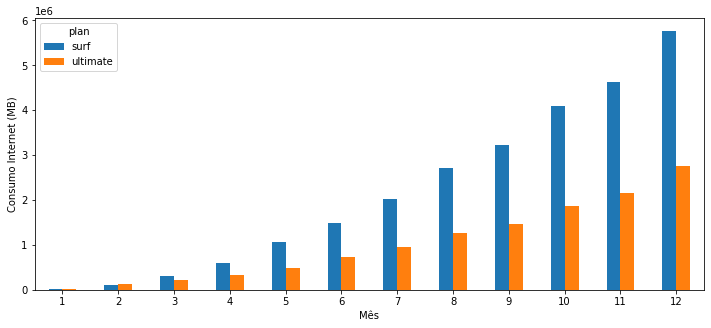

In [46]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
internet_by_month = pd.pivot_table(df_user_usage_by_month, values='mb_used', index='month', columns='plan', aggfunc='sum')
internet_by_month.plot(kind='bar', figsize=(12,5), ylabel='Consumo Internet (MB)', xlabel='Mês', rot=0)


<AxesSubplot:xlabel='Mês', ylabel='Média de consumo de internet'>

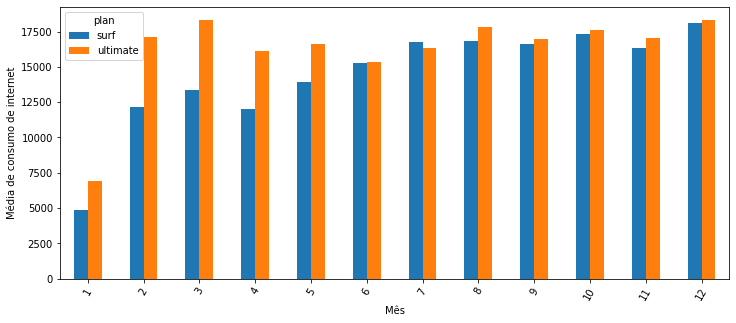

In [47]:
#Média de consumo de internet por mês dos usuários de cada plano
internet_by_user_mean = internet_by_month/user_count_by_month
internet_by_user_mean.plot(kind='bar', figsize=(12,5), ylabel='Média de consumo de internet', xlabel='Mês', rot=60)

O consumo de internet dos usuários do plano surf é maior devido a maior quantidade de usuários desse plano, mas quando olhamos para a média de consumo por usuário, o consumo se mantem próximo do mês 6 para frente, quando a base de usuários é maior, no início do ano vemos um uso maior por parte dos usuários do plano ultimate. Os usuários do plano ultimate se sentem mais a vontade usando a internet que o plano lhes dá, mas mesmo assim não chegam perto dos 30GB disponibilizados, já os usuários do plano Surf ficam  próximos do limite de 15GB ofertado pelo plano, mas essa é a média dos usuários em geral, então não é possível afirmar que o consumo é influenciado pelo plano, tanto para menos quanto para mais.

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

<AxesSubplot:xlabel='Mês', ylabel='Receita'>

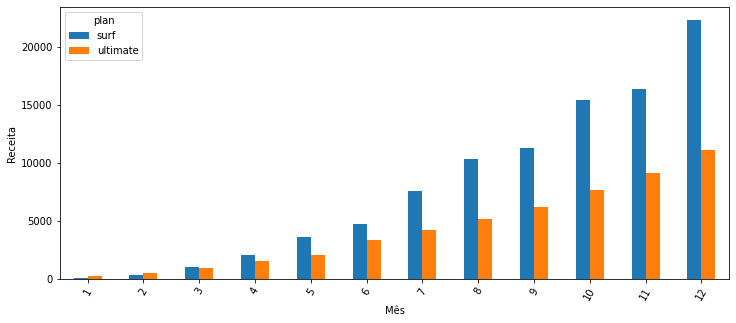

In [48]:
# Receita dos planos por mês
revenue_by_month = pd.pivot_table(df_user_usage_by_month, values='revenue', index='month', columns='plan', aggfunc='sum')
revenue_by_month.plot(kind='bar', figsize=(12,5), ylabel='Receita', xlabel='Mês', rot=60)

<AxesSubplot:xlabel='Mês', ylabel='Média da Receita por usuário de cada plano'>

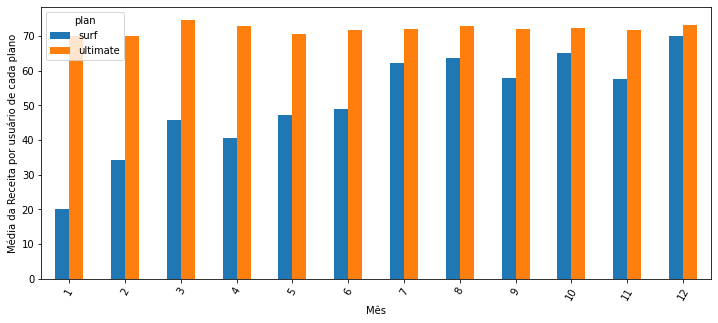

In [49]:
# Média de receita por mês dos usuários de cada plano
revenue_by_user_mean = revenue_by_month/user_count_by_month
revenue_by_user_mean.plot(kind='bar', figsize=(12,5), ylabel='Média da Receita por usuário de cada plano', xlabel='Mês', rot=60)

A receita advinda do plano Surf é muito maior que a do plano Ultimate, uma parte da diferença é explicada pela maior quantidade usuários. Mas ao analisar a receita média por usuário, identificamos que o usuário do plano Surf tende a estourar os limites oferecidos pelo plano e pagar as taxas extras, sendo que no mês de dezembro houve uma receita média por usuário quase igual a do plano Ultimate, mesmo a diferença de tarifa base sendo de 20 para 70. A receita do plano ultimate é mais estável, os usuários deste plano tendem a não usar as tarifas extras.

## Teste hipóteses estatísticas

[Teste a hipótese de que as receitas médias dos usuários dos planos de chamadas Ultimate e Surf são diferentes.]

<div class="alert alert-block alert-info">
<b>Hipótese Nula = Não há diferença entre as receitas médias dos planos Surf e Ultimate.<br>
Hipótese Alternativa = Há diferença entre as receitas médias do planos</b> <a class="tocSkip"></a>
</div>



In [53]:
# Teste as hipóteses
#Receita dos usuários do plano Surf
surf_revenue = df_user_usage_by_month[df_user_usage_by_month['plan'] == 'surf']['revenue']
#Receita dos usuários do plano Ultimate
ultimate_revenue = df_user_usage_by_month[df_user_usage_by_month['plan'] == 'ultimate']['revenue']

#Limite de 5% para aceitar a hipótese nula, para cima ou para baixo
alpha = 0.05

#Teste Levene para suposição de igualdade das variâncias
plans_revenue_levene_test = st.levene(surf_revenue, ultimate_revenue, center='mean')

print('valor-p: ', plans_revenue_levene_test.pvalue) # extraindo o valor-p

if plans_revenue_levene_test.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula de Levene")
else:
    print("Não rejeitamos a hipótese nula de Levene") 



valor-p:  1.061294265045663e-116
Rejeitamos a hipótese nula


In [54]:
#Realizando Teste T com equal_var=False
plans_revenue_t_test = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)


print('valor-p: ', plans_revenue_t_test.pvalue) # extraindo o valor-p

if plans_revenue_t_test.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula") 

valor-p:  3.6278039040985444e-16
Rejeitamos a hipótese nula


<div class="alert alert-block alert-info">
<b>Existe diferença entre a receita média dos planos. O custo base do plano Ultimate mantém uma receita mais consistente e a variação e <a class="tocSkip"></a>
</div>


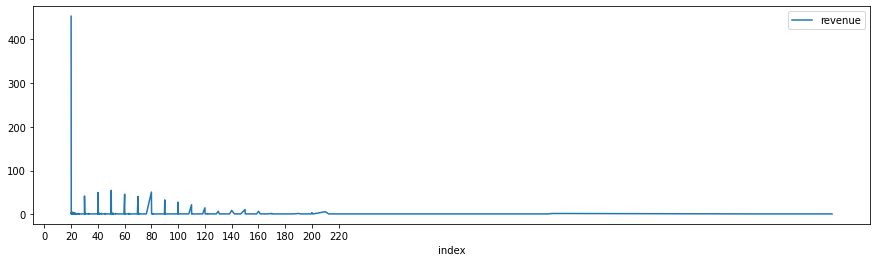

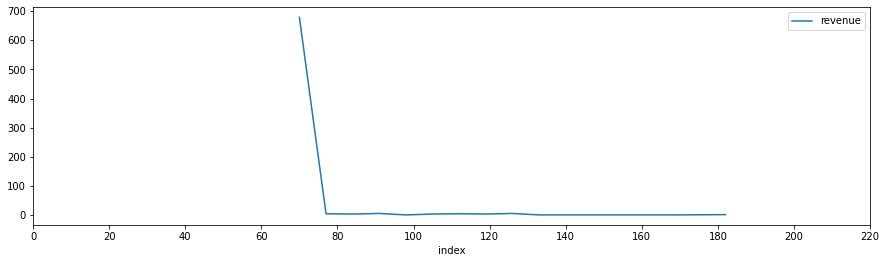

In [57]:
#Gráfico das receitas do planos surf e Ultimate para uma visão gráfica da rejeição da hipótese nula
surf_sorted = surf_revenue.value_counts().reset_index().sort_values(by='index')
ax = surf_sorted.plot(x='index', y='revenue', figsize=(15,4))

plt.xticks(np.arange(0, 230, 20))
ultimate_revenue.value_counts().reset_index().sort_values(by='index').plot(x='index', y='revenue', figsize=(15,4))
plt.xticks(np.arange(0, 230, 20))
plt.show()

[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

<div class="alert alert-block alert-info">
<b>Hipótese Nula = Não há diferença entre as receitas médias da região de NY-NJ para as demais regiões.<br>
Hipótese Alternativa = Há diferença entre as receitas médias da região de NY-NJ para as demais regiões.</b> <a class="tocSkip"></a>
</div>


In [58]:
#Separar as amostras da área de NY-NJ
state = 'NY-NJ'
ny_nj_users = df_users[(df_users['state'].str.contains(state))]['user_id']
ny_nj_usage = df_user_usage_by_month.query( "user_id in @ny_nj_users")

In [59]:
# Outras áreas
other_users = df_users[~(df_users['state'].str.contains(state))]['user_id']
other_usage = df_user_usage_by_month.query( "user_id in @other_users")

In [61]:
# Teste as hipóteses

#Receita dos usuários da área de NY-NJ
ny_nj_revenue = ny_nj_usage['revenue']
#Receita dos usuários das demais regiões
other_revenue = other_usage['revenue']
#Limite de 5% para aceitar a hipótese nula, para cima ou para baixo
alpha = 0.05

#Teste Levene para suposição de igualdade das variâncias
regions_revenue_levene_test = st.levene(ny_nj_revenue, other_revenue, center='mean')

print('valor-p: ', regions_revenue_levene_test.pvalue) # extraindo o valor-p

if regions_revenue_levene_test.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula de Levene")
else:
    print("Não rejeitamos a hipótese nula de Levene") 



valor-p:  0.17644903028616707
Não rejeitamos a hipótese nula de Levene


In [62]:
#Realizando Teste T com equal_var=True
regions_revenue_t_test = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=True)


print('valor-p: ', regions_revenue_t_test.pvalue) # extraindo o valor-p

if regions_revenue_t_test.pvalue < alpha: # comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  0.04076784279879048
Rejeitamos a hipótese nula


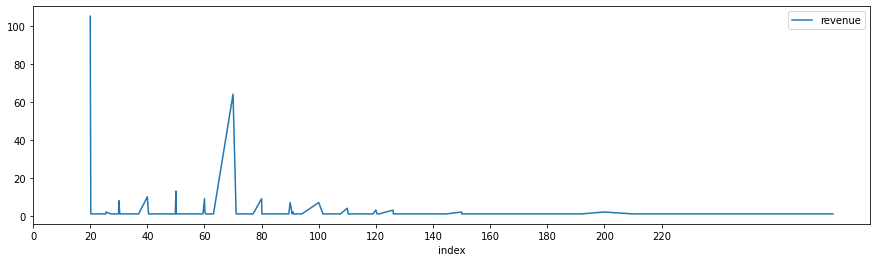

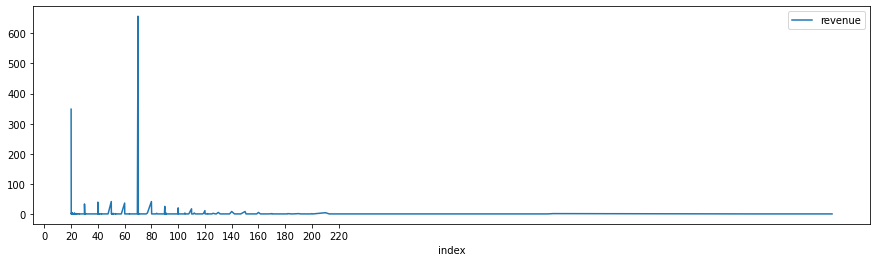

In [54]:
ny_nj_sorted = ny_nj_revenue.value_counts().reset_index().sort_values(by='index')
ax = ny_nj_sorted.plot(x='index', y='revenue', figsize=(15,4))

plt.xticks(np.arange(0, 230, 20))
other_revenue.value_counts().reset_index().sort_values(by='index').plot(x='index', y='revenue', figsize=(15,4))
plt.xticks(np.arange(0, 230, 20))
plt.show()

## Conclusão geral


A receita da região de NY-NJ difere da receita das demais regiões, isso é explicado pelo fato da predominância de planos Surf na região que impacta na média receita. enquanto as outras regiões têm um número mais predominante de planos Ultimate. Como os usuários do plano Surf no final ano tiveram uma receita média mais próxima dos usuários plano Ultimate, então a diferença diminuiu, mas não o suficiente pra podermos afirmar que não diferença de receita média entre as regiões